In [1]:
%pylab inline
import pandas as pd
import sys
import gc

Populating the interactive namespace from numpy and matplotlib


In [2]:
def simple_mean(files):
    lst=[pd.read_csv(fname,index_col=0) for fname in files]
    df=0
    for u in lst:
        df=df+np.log1p(u)
    df=df/len(lst)
    df=np.expm1(df)
    return df

In [3]:
name='3003nb_conv_fold{}_False_d478.csv.gz' 
files=['../submission/'+name.format(i) for i in range(5)]
u=simple_mean(files)

In [4]:
u.to_csv("../submission/"+ name.format('mean'),compression='gzip')

In [13]:
for v in [0.495,0.485,0.475,0.465]:
    print v, np.sqrt(1-v**2/0.65241814)

0.495 0.790212402991
0.485 0.799660355031
0.475 0.808808489759
0.465 0.817666870392


In [238]:
!ls ../submission/ -alrt|tail

-rw-rw-r--  1 bo bo  337118 Feb  2 16:13 3001eb_lgb_foldmean_True_d478.csv.gz
-rw-rw-r--  1 bo bo  259631 Feb  2 16:37 3000_ridge_fold0_False_d478.csv.gz
-rw-rw-r--  1 bo bo  259313 Feb  2 16:37 3000_ridge_fold1_False_d478.csv.gz
-rw-rw-r--  1 bo bo  259617 Feb  2 16:37 3000_ridge_fold2_False_d478.csv.gz
-rw-rw-r--  1 bo bo  259155 Feb  2 16:37 3000_ridge_fold3_False_d478.csv.gz
-rw-rw-r--  1 bo bo  259683 Feb  2 16:37 3000_ridge_fold4_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337098 Feb  2 16:37 3000_ridge_foldmean_False_d478.csv.gz
-rw-rw-r--  1 bo bo  337241 Feb  2 17:18 3003_conv_fold3_False_d478.csv.gz
drwxrwxr-x  2 bo bo    4096 Feb  2 20:19 .
-rw-rw-r--  1 bo bo  337224 Feb  2 20:19 3003_conv_fold4_False_d478.csv.gz


In [18]:
sys.path.insert(0,"../python/rrvf2017/")

In [49]:
from rrvf_data import read_data,show_data,show_data2,show_features, normalize, DataGen
import rrvf_data

In [20]:
columns,data=read_data()
len(columns),data.shape

(1, 829, 517) (54, 829, 517)


(62, (829, 517, 62))

In [21]:
def get_index(cols):
    lst=[]
    for c in cols:
        lst.append(np.where(columns==c)[0][0])
    return np.array(lst)

In [181]:
rawy=data[:,:,get_index(['visitors'])[0]].copy()
rawy.shape

(829, 517)

In [205]:
rawy=rawy[:,200:478]

In [206]:
def g(rawy):
    ind=(~np.isnan(rawy)).astype(np.int32)
    for s in ind:
        i=np.where(s>0)[0][0]
        s[i:]=1
    return ind
yind=g(rawy)

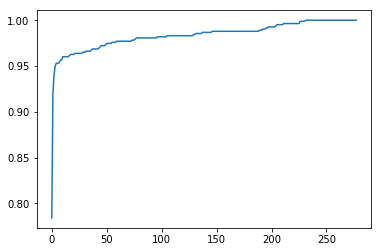

In [38]:
plt.plot(yind.mean(0));

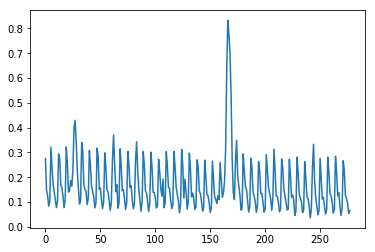

In [40]:
plt.plot(1.0*np.isnan(rawy).sum(0)/yind.sum(0))

In [57]:
def g(rawy,yind):
    ind=~np.isnan(rawy)
    df=pd.DataFrame({'a':1.0*ind.sum(0)/yind.sum(0)})
    df['date']=rrvf_data.idx_to_date(df.index+200)
    df['wd']=pd.to_datetime(df['date']).map(lambda u: u.weekday()+1)
    return df

In [59]:
g(rawy,yind).groupby('wd').mean()

a
wd          
1   0.751642
2   0.850593
3   0.867183
4   0.896652
5   0.938426
6   0.910710
7   0.711619

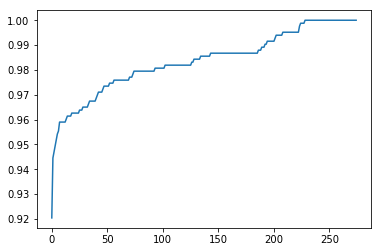

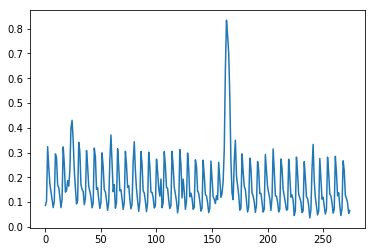

a
wd          
0   0.752450
1   0.847641
2   0.866226
3   0.896483
4   0.940080
5   0.911783
6   0.712429

{0: 1.0404623746871948, 1: 0.9248554706573486, 2: 0.9826589822769165, 3: 1.0693641901016235, 4: 0.9580925107002258, 5: 1.070809245109558, 6: 0.9537572264671326}


In [198]:
def get_y_nan_index(_rawy):
    def g(rawy):
        ind=(~np.isnan(rawy)).astype(np.int32)
        for s in ind:
            i=np.where(s>0)[0][0]
            s[i:]=1
        return ind
    rawy=_rawy[:,203:478]
    yind=g(rawy)    
    plt.plot(yind.mean(0));plt.show()
    plt.plot(1.0*np.isnan(rawy).sum(0)/yind.sum(0));plt.show()
    def g(rawy,yind):
        ind=~np.isnan(rawy)
        df=pd.DataFrame({'a':1.0*ind.sum(0)/yind.sum(0)})
        df['date']=rrvf_data.idx_to_date(df.index+203)
        df['wd']=pd.to_datetime(df['date']).map(lambda u: u.weekday())
        return df
    display(g(rawy,yind).groupby('wd').mean())
    def g(i, rawy,yind):
        ind= (~np.isnan(rawy[i])).astype(np.float)
        yind=yind[i]
        df=pd.DataFrame({'a':ind,'ind':yind})
        df['date']=rrvf_data.idx_to_date(df.index+203)
        df['wd']=pd.to_datetime(df['date']).map(lambda u: u.weekday())
        df=df[df['ind']>0]

        df=df.groupby('wd').mean()
        df['a']=(df['a']/df['a'].mean()).astype(np.float32)
        df['store']=i
        return df['a'].to_dict()
    print g(521,rawy,yind)
get_y_nan_index(rawy)

In [208]:
def g(i, rawy,yind):
    ind= (~np.isnan(rawy[i])).astype(np.float)
    yind=yind[i]
    df=pd.DataFrame({'a':ind,'ind':yind})
    df['date']=rrvf_data.idx_to_date(df.index+200)
    df['wd']=pd.to_datetime(df['date']).map(lambda u: u.weekday()+1)
    df=df[df['ind']>0]
    
    df=df.groupby('wd').mean()
    #df=df[(df['a']>0) & (df['a']<1)]
    df['a']=df['a']/df['a'].max()
    #df=df[ (df['a']<0.5)]

    df['store']=i
    df['size']=np.sum(yind)
    df['n']=np.sum(ind)

    if df.shape[0]>0:
        display(df)

In [209]:
rawy.shape,yind.shape

((829, 278), (829, 278))

In [212]:
for i in set([386.0, 515.0, 388.0, 5.0, 647.0, 520.0, 307.0, 503.0, 11.0, 268.0, 13.0, 398.0, 271.0, 145.0, 146.0, 771.0, 20.0, 814.0, 406.0, 537.0, 665.0, 26.0, 156.0, 773.0, 289.0, 674.0, 163.0, 420.0, 679.0, 92.0, 135.0, 46.0, 176.0, 691.0, 180.0, 309.0, 521.0, 23.0, 116.0, 315.0, 151.0, 446.0, 565.0, 705.0, 195.0, 227.0, 325.0, 327.0, 456.0, 329.0, 587.0, 204.0, 462.0, 707.0, 466.0, 339.0, 724.0, 526.0, 728.0, 729.0, 90.0, 591.0, 604.0, 95.0, 225.0, 443.0, 374.0, 487.0, 744.0, 746.0, 363.0, 236.0, 110.0, 772.0, 19.0, 756.0, 89.0, 119.0, 636.0, 618.0, 254.0, 277.0]):
    g(int(i),rawy,yind)
    if i>5000:
        pass
        break

a  ind  store  size      n
wd                                   
1   0.701754    1    386   277  210.0
2   0.782726    1    386   277  210.0
3   0.763158    1    386   277  210.0
4   0.789474    1    386   277  210.0
5   1.000000    1    386   277  210.0
6   1.000000    1    386   277  210.0
7   0.539811    1    386   277  210.0

a  ind  store  size      n
wd                                   
1   0.743590    1    515   277  223.0
2   0.358974    1    515   277  223.0
3   0.800000    1    515   277  223.0
4   0.850000    1    515   277  223.0
5   0.950000    1    515   277  223.0
6   1.000000    1    515   277  223.0
7   0.923077    1    515   277  223.0

a  ind  store  size      n
wd                                   
1   0.974359    1    388   278  270.0
2   0.975000    1    388   278  270.0
3   1.000000    1    388   278  270.0
4   1.000000    1    388   278  270.0
5   0.975000    1    388   278  270.0
6   0.950000    1    388   278  270.0
7   0.923077    1    388   278  270.0

a  ind  store  size      n
wd                                   
1   0.998650    1      5   278  263.0
2   1.000000    1      5   278  263.0
3   1.000000    1      5   278  263.0
4   0.973684    1      5   278  263.0
5   1.000000    1      5   278  263.0
6   1.000000    1      5   278  263.0
7   0.998650    1      5   278  263.0

a  ind  store  size      n
wd                                   
1   0.820513    1    647   278  225.0
2   0.975000    1    647   278  225.0
3   0.975000    1    647   278  225.0
4   0.950000    1    647   278  225.0
5   1.000000    1    647   278  225.0
6   0.800000    1    647   278  225.0
7   0.128205    1    647   278  225.0

a  ind  store  size      n
wd                                   
1   0.740741    1    520   278  202.0
2   0.833333    1    520   278  202.0
3   0.416667    1    520   278  202.0
4   0.861111    1    520   278  202.0
5   1.000000    1    520   278  202.0
6   0.916667    1    520   278  202.0
7   0.883191    1    520   278  202.0

a  ind  store  size      n
wd                                   
1   0.971660    1    521   278  246.0
2   0.868421    1    521   278  246.0
3   0.921053    1    521   278  246.0
4   0.973684    1    521   278  246.0
5   0.894737    1    521   278  246.0
6   1.000000    1    521   278  246.0
7   0.890688    1    521   278  246.0

a  ind  store  size      n
wd                                   
1   0.894149    1     11   278  255.0
2   0.974359    1     11   278  255.0
3   0.948718    1     11   278  255.0
4   0.974359    1     11   278  255.0
5   1.000000    1     11   278  255.0
6   0.923077    1     11   278  255.0
7   0.867850    1     11   278  255.0

a  ind  store  size      n
wd                                   
1   0.230769    1    268   277  233.0
2   0.769231    1    268   277  233.0
3   0.950000    1    268   277  233.0
4   1.000000    1    268   277  233.0
5   1.000000    1    268   277  233.0
6   0.975000    1    268   277  233.0
7   0.948718    1    268   277  233.0

a  ind  store  size      n
wd                                   
1   1.000000    1     13   277  271.0
2   0.846154    1     13   277  271.0
3   1.000000    1     13   277  271.0
4   1.000000    1     13   277  271.0
5   1.000000    1     13   277  271.0
6   1.000000    1     13   277  271.0
7   1.000000    1     13   277  271.0

a  ind  store  size      n
wd                                   
1   0.948718    1    398   278  271.0
2   0.950000    1    398   278  271.0
3   0.975000    1    398   278  271.0
4   1.000000    1    398   278  271.0
5   1.000000    1    398   278  271.0
6   1.000000    1    398   278  271.0
7   0.948718    1    398   278  271.0

a  ind  store  size      n
wd                                   
1   0.842105    1    271   268  236.0
2   0.947368    1    271   268  236.0
3   0.973684    1    271   268  236.0
4   1.000000    1    271   268  236.0
5   1.000000    1    271   268  236.0
6   0.974359    1    271   268  236.0
7   0.421053    1    271   268  236.0

a  ind  store  size      n
wd                                   
1   0.971660    1    618   278  221.0
2   0.921053    1    618   278  221.0
3   0.052632    1    618   278  221.0
4   0.973684    1    618   278  221.0
5   1.000000    1    618   278  221.0
6   0.947368    1    618   278  221.0
7   0.998650    1    618   278  221.0

a  ind  store  size      n
wd                                   
1   0.974359    1    145   278  239.0
2   0.975000    1    145   278  239.0
3   1.000000    1    145   278  239.0
4   1.000000    1    145   278  239.0
5   1.000000    1    145   278  239.0
6   0.975000    1    145   278  239.0
7   0.076923    1    145   278  239.0

a  ind  store  size      n
wd                                   
1   0.717949    1    146   277  262.0
2   0.948718    1    146   277  262.0
3   0.975000    1    146   277  262.0
4   0.975000    1    146   277  262.0
5   1.000000    1    146   277  262.0
6   1.000000    1    146   277  262.0
7   1.000000    1    146   277  262.0

a  ind  store  size      n
wd                                   
1   0.897436    1    771   277  266.0
2   0.923077    1    771   277  266.0
3   0.950000    1    771   277  266.0
4   1.000000    1    771   277  266.0
5   1.000000    1    771   277  266.0
6   0.975000    1    771   277  266.0
7   0.974359    1    771   277  266.0

a  ind  store  size      n
wd                                   
1   0.841552    1     20   278  219.0
2   0.948718    1     20   278  219.0
3   1.000000    1     20   278  219.0
4   1.000000    1     20   278  219.0
5   1.000000    1     20   278  219.0
6   0.743590    1     20   278  219.0
7   0.105194    1     20   278  219.0

a  ind  store  size      n
wd                                   
1   0.897436    1     46   278  271.0
2   0.950000    1     46   278  271.0
3   1.000000    1     46   278  271.0
4   1.000000    1     46   278  271.0
5   1.000000    1     46   278  271.0
6   1.000000    1     46   278  271.0
7   0.974359    1     46   278  271.0

a  ind  store  size      n
wd                                   
1   0.188934    1    406   277  168.0
2   0.134953    1    406   277  168.0
3   1.000000    1    406   277  168.0
4   0.710526    1    406   277  168.0
5   0.684211    1    406   277  168.0
6   0.868421    1    406   277  168.0
7   0.863698    1    406   277  168.0

a  ind  store  size      n
wd                                   
1   0.788955    1    537   278  220.0
2   0.974359    1    537   278  220.0
3   0.974359    1    537   278  220.0
4   0.948718    1    537   278  220.0
5   0.948718    1    537   278  220.0
6   1.000000    1    537   278  220.0
7   0.026298    1    537   278  220.0

a  ind  store  size      n
wd                                
1   1.000    1    665   278  277.0
2   1.000    1    665   278  277.0
3   0.975    1    665   278  277.0
4   1.000    1    665   278  277.0
5   1.000    1    665   278  277.0
6   1.000    1    665   278  277.0
7   1.000    1    665   278  277.0

a  ind  store  size      n
wd                                   
1   0.820513    1     26   278  265.0
2   0.900000    1     26   278  265.0
3   0.975000    1     26   278  265.0
4   0.975000    1     26   278  265.0
5   1.000000    1     26   278  265.0
6   1.000000    1     26   278  265.0
7   1.000000    1     26   278  265.0

a  ind  store  size      n
wd                                   
1   0.973044    1    156   278  230.0
2   0.897436    1    156   278  230.0
3   0.076923    1    156   278  230.0
4   1.000000    1    156   278  230.0
5   1.000000    1    156   278  230.0
6   1.000000    1    156   278  230.0
7   0.999343    1    156   278  230.0

a  ind  store  size      n
wd                                   
1   0.973684    1    773   278  224.0
2   0.975000    1    773   278  224.0
3   0.898026    1    773   278  224.0
4   0.076974    1    773   278  224.0
5   0.898026    1    773   278  224.0
6   0.975000    1    773   278  224.0
7   1.000000    1    773   278  224.0

a  ind  store  size      n
wd                                   
1   0.473373    1    289   278  239.0
2   0.948718    1    289   278  239.0
3   1.000000    1    289   278  239.0
4   0.974359    1    289   278  239.0
5   0.974359    1    289   278  239.0
6   1.000000    1    289   278  239.0
7   0.788955    1    289   278  239.0

a  ind  store  size      n
wd                                   
1   0.692308    1    674   278  250.0
2   0.950000    1    674   278  250.0
3   0.950000    1    674   278  250.0
4   0.950000    1    674   278  250.0
5   1.000000    1    674   278  250.0
6   0.975000    1    674   278  250.0
7   0.769231    1    674   278  250.0

a  ind  store  size      n
wd                                   
1   0.920447    1    163   278  244.0
2   0.948718    1    163   278  244.0
3   0.974359    1    163   278  244.0
4   1.000000    1    163   278  244.0
5   1.000000    1    163   278  244.0
6   0.974359    1    163   278  244.0
7   0.473373    1    163   278  244.0

a  ind  store  size      n
wd                                   
1   0.083160    1    420   278  216.0
2   0.945946    1    420   278  216.0
3   0.972973    1    420   278  216.0
4   1.000000    1    420   278  216.0
5   0.891892    1    420   278  216.0
6   0.972973    1    420   278  216.0
7   0.997921    1    420   278  216.0

a  ind  store  size      n
wd                                   
1   0.820513    1    679   278  237.0
2   0.975000    1    679   278  237.0
3   0.975000    1    679   278  237.0
4   0.950000    1    679   278  237.0
5   1.000000    1    679   278  237.0
6   0.975000    1    679   278  237.0
7   0.256410    1    679   278  237.0

a  ind  store  size      n
wd                                   
1   0.923077    1    604   277  232.0
2   0.025641    1    604   277  232.0
3   0.975000    1    604   277  232.0
4   1.000000    1    604   277  232.0
5   0.975000    1    604   277  232.0
6   0.975000    1    604   277  232.0
7   0.974359    1    604   277  232.0

a  ind  store  size      n
wd                                   
1   0.974359    1    135   278  235.0
2   0.975000    1    135   278  235.0
3   0.950000    1    135   278  235.0
4   1.000000    1    135   278  235.0
5   0.975000    1    135   278  235.0
6   0.900000    1    135   278  235.0
7   0.128205    1    135   278  235.0

a  ind  store  size      n
wd                                   
1   0.974359    1    814   277  237.0
2   0.102564    1    814   277  237.0
3   1.000000    1    814   277  237.0
4   1.000000    1    814   277  237.0
5   0.950000    1    814   277  237.0
6   0.975000    1    814   277  237.0
7   0.974359    1    814   277  237.0

a  ind  store  size      n
wd                                   
1   0.897436    1    176   277  250.0
2   0.692308    1    176   277  250.0
3   0.800000    1    176   277  250.0
4   1.000000    1    176   277  250.0
5   0.975000    1    176   277  250.0
6   1.000000    1    176   277  250.0
7   0.948718    1    176   277  250.0

a  ind  store  size      n
wd                                   
1   0.974359    1    307   278  274.0
2   0.975000    1    307   278  274.0
3   0.975000    1    307   278  274.0
4   1.000000    1    307   278  274.0
5   1.000000    1    307   278  274.0
6   1.000000    1    307   278  274.0
7   0.974359    1    307   278  274.0

a  ind  store  size      n
wd                                   
1   0.820513    1    180   278  265.0
2   0.925000    1    180   278  265.0
3   0.975000    1    180   278  265.0
4   1.000000    1    180   278  265.0
5   1.000000    1    180   278  265.0
6   1.000000    1    180   278  265.0
7   0.948718    1    180   278  265.0

a  ind  store  size      n
wd                                   
1   0.717949    1    309   277  230.0
2   0.256410    1    309   277  230.0
3   1.000000    1    309   277  230.0
4   1.000000    1    309   277  230.0
5   1.000000    1    309   277  230.0
6   0.950000    1    309   277  230.0
7   0.871795    1    309   277  230.0

a  ind  store  size      n
wd                                   
1   0.923077    1     23   278  264.0
2   0.975000    1     23   278  264.0
3   0.975000    1     23   278  264.0
4   0.975000    1     23   278  264.0
5   1.000000    1     23   278  264.0
6   0.975000    1     23   278  264.0
7   0.820513    1     23   278  264.0

a  ind  store  size      n
wd                                   
1   0.923077    1    756   277  233.0
2   0.205128    1    756   277  233.0
3   0.950000    1    756   277  233.0
4   0.925000    1    756   277  233.0
5   1.000000    1    756   277  233.0
6   0.950000    1    756   277  233.0
7   0.923077    1    756   277  233.0

a  ind  store  size      n
wd                                   
1   0.846154    1    315   278  226.0
2   0.950000    1    315   278  226.0
3   0.950000    1    315   278  226.0
4   0.950000    1    315   278  226.0
5   1.000000    1    315   278  226.0
6   0.975000    1    315   278  226.0
7   0.000000    1    315   278  226.0

a  ind  store  size      n
wd                                   
1   0.769231    1    151   278  241.0
2   0.900000    1    151   278  241.0
3   0.950000    1    151   278  241.0
4   0.950000    1    151   278  241.0
5   1.000000    1    151   278  241.0
6   0.975000    1    151   278  241.0
7   0.512821    1    151   278  241.0

a  ind  store  size      n
wd                                   
1   0.999343    1     89   278  266.0
2   0.974359    1     89   278  266.0
3   1.000000    1     89   278  266.0
4   0.974359    1     89   278  266.0
5   0.974359    1     89   278  266.0
6   0.974359    1     89   278  266.0
7   0.973044    1     89   278  266.0

a  ind  store  size      n
wd                                
1   1.000    1    446   278  275.0
2   0.975    1    446   278  275.0
3   0.975    1    446   278  275.0
4   0.975    1    446   278  275.0
5   1.000    1    446   278  275.0
6   1.000    1    446   278  275.0
7   1.000    1    446   278  275.0

a  ind  store  size      n
wd                                   
1   0.923077    1    565   276  202.0
2   0.076923    1    565   276  202.0
3   0.256410    1    565   276  202.0
4   0.925000    1    565   276  202.0
5   0.975000    1    565   276  202.0
6   0.950000    1    565   276  202.0
7   1.000000    1    565   276  202.0

a  ind  store  size      n
wd                                   
1   0.948718    1    705   278  276.0
2   1.000000    1    705   278  276.0
3   1.000000    1    705   278  276.0
4   1.000000    1    705   278  276.0
5   1.000000    1    705   278  276.0
6   1.000000    1    705   278  276.0
7   1.000000    1    705   278  276.0

a  ind  store  size      n
wd                                   
1   0.973044    1    195   278  230.0
2   1.000000    1    195   278  230.0
3   0.974359    1    195   278  230.0
4   1.000000    1    195   278  230.0
5   1.000000    1    195   278  230.0
6   0.974359    1    195   278  230.0
7   0.000000    1    195   278  230.0

a  ind  store  size      n
wd                                   
1   0.051282    1    325   278  232.0
2   0.925000    1    325   278  232.0
3   0.975000    1    325   278  232.0
4   1.000000    1    325   278  232.0
5   0.950000    1    325   278  232.0
6   0.975000    1    325   278  232.0
7   0.948718    1    325   278  232.0

a  ind  store  size      n
wd                                   
1   0.102564    1    327   278  235.0
2   0.925000    1    327   278  235.0
3   0.950000    1    327   278  235.0
4   1.000000    1    327   278  235.0
5   0.975000    1    327   278  235.0
6   0.975000    1    327   278  235.0
7   0.974359    1    327   278  235.0

a  ind  store  size      n
wd                                   
1   0.841552    1    456   278  231.0
2   0.974359    1    456   278  231.0
3   1.000000    1    456   278  231.0
4   1.000000    1    456   278  231.0
5   1.000000    1    456   278  231.0
6   0.897436    1    456   278  231.0
7   0.236686    1    456   278  231.0

a  ind  store  size      n
wd                                   
1   0.946746    1    329   276  223.0
2   0.841552    1    329   276  223.0
3   0.026298    1    329   276  223.0
4   0.974359    1    329   276  223.0
5   1.000000    1    329   276  223.0
6   1.000000    1    329   276  223.0
7   0.999343    1    329   276  223.0

a  ind  store  size      n
wd                                   
1   0.215924    1    587   277  228.0
2   0.917679    1    587   277  228.0
3   1.000000    1    587   277  228.0
4   1.000000    1    587   277  228.0
5   1.000000    1    587   277  228.0
6   1.000000    1    587   277  228.0
7   0.917679    1    587   277  228.0

a  ind  store  size      n
wd                                   
1   0.890688    1    204   278  215.0
2   1.000000    1    204   278  215.0
3   0.921053    1    204   278  215.0
4   0.947368    1    204   278  215.0
5   0.947368    1    204   278  215.0
6   0.973684    1    204   278  215.0
7   0.000000    1    204   278  215.0

a  ind  store  size      n
wd                                   
1   0.973044    1    462   278  265.0
2   1.000000    1    462   278  265.0
3   1.000000    1    462   278  265.0
4   0.948718    1    462   278  265.0
5   1.000000    1    462   278  265.0
6   1.000000    1    462   278  265.0
7   0.920447    1    462   278  265.0

a  ind  store  size      n
wd                                   
1   0.890688    1    591   278  247.0
2   0.947368    1    591   278  247.0
3   0.868421    1    591   278  247.0
4   0.894737    1    591   278  247.0
5   0.947368    1    591   278  247.0
6   1.000000    1    591   278  247.0
7   0.998650    1    591   278  247.0

a  ind  store  size      n
wd                                   
1   0.973044    1    466   278  260.0
2   1.000000    1    466   278  260.0
3   1.000000    1    466   278  260.0
4   0.743590    1    466   278  260.0
5   1.000000    1    466   278  260.0
6   1.000000    1    466   278  260.0
7   0.999343    1    466   278  260.0

a  ind  store  size      n
wd                                   
1   0.415800    1    339   277  217.0
2   0.887041    1    339   277  217.0
3   0.972973    1    339   277  217.0
4   0.972973    1    339   277  217.0
5   1.000000    1    339   277  217.0
6   1.000000    1    339   277  217.0
7   0.665281    1    339   277  217.0

a  ind  store  size      n
wd                                   
1   0.937729    1    724   278  206.0
2   0.285714    1    724   278  206.0
3   0.885714    1    724   278  206.0
4   0.942857    1    724   278  206.0
5   0.942857    1    724   278  206.0
6   1.000000    1    724   278  206.0
7   0.937729    1    724   278  206.0

a  ind  store  size      n
wd                                   
1   0.867850    1    526   278  228.0
2   0.948718    1    526   278  228.0
3   1.000000    1    526   278  228.0
4   1.000000    1    526   278  228.0
5   1.000000    1    526   278  228.0
6   1.000000    1    526   278  228.0
7   0.052597    1    526   278  228.0

a  ind  store  size      n
wd                                   
1   0.890688    1    728   278  195.0
2   1.000000    1    728   278  195.0
3   1.000000    1    728   278  195.0
4   0.973684    1    728   278  195.0
5   1.000000    1    728   278  195.0
6   0.236842    1    728   278  195.0
7   0.053981    1    728   278  195.0

a  ind  store  size      n
wd                                   
1   0.868421    1    729   278  252.0
2   0.898026    1    729   278  252.0
3   0.923684    1    729   278  252.0
4   0.898026    1    729   278  252.0
5   0.949342    1    729   278  252.0
6   0.975000    1    729   278  252.0
7   1.000000    1    729   278  252.0

a  ind  store  size      n
wd                                   
1   0.871795    1     90   278  255.0
2   0.875000    1     90   278  255.0
3   0.950000    1     90   278  255.0
4   0.975000    1     90   278  255.0
5   0.975000    1     90   278  255.0
6   1.000000    1     90   278  255.0
7   0.769231    1     90   278  255.0

a  ind  store  size      n
wd                                   
1   0.000000    1     92   278  194.0
2   0.823529    1     92   278  194.0
3   0.970588    1     92   278  194.0
4   1.000000    1     92   278  194.0
5   1.000000    1     92   278  194.0
6   0.941176    1     92   278  194.0
7   0.995475    1     92   278  194.0

a  ind  store  size      n
wd                                   
1   0.948718    1     95   278  266.0
2   0.950000    1     95   278  266.0
3   0.875000    1     95   278  266.0
4   0.975000    1     95   278  266.0
5   1.000000    1     95   278  266.0
6   0.975000    1     95   278  266.0
7   0.974359    1     95   278  266.0

a  ind  store  size      n
wd                                   
1   0.920447    1    746   278  232.0
2   0.897436    1    746   278  232.0
3   1.000000    1    746   278  232.0
4   0.820513    1    746   278  232.0
5   1.000000    1    746   278  232.0
6   1.000000    1    746   278  232.0
7   0.341880    1    746   278  232.0

a  ind  store  size      n
wd                                   
1   0.890688    1    225   278  223.0
2   1.000000    1    225   278  223.0
3   0.973684    1    225   278  223.0
4   1.000000    1    225   278  223.0
5   1.000000    1    225   278  223.0
6   1.000000    1    225   278  223.0
7   0.026991    1    225   278  223.0

a  ind  store  size      n
wd                                   
1   0.815253    1    227   278  236.0
2   0.794872    1    227   278  236.0
3   0.743590    1    227   278  236.0
4   0.948718    1    227   278  236.0
5   1.000000    1    227   278  236.0
6   0.948718    1    227   278  236.0
7   0.841552    1    227   278  236.0

a  ind  store  size      n
wd                                   
1   0.923077    1    374   278  267.0
2   0.975000    1    374   278  267.0
3   1.000000    1    374   278  267.0
4   0.975000    1    374   278  267.0
5   0.975000    1    374   278  267.0
6   0.975000    1    374   278  267.0
7   0.897436    1    374   278  267.0

a  ind  store  size      n
wd                                   
1   0.000000    1    487   278  192.0
2   0.973684    1    487   278  192.0
3   0.973684    1    487   278  192.0
4   0.947368    1    487   278  192.0
5   0.973684    1    487   278  192.0
6   1.000000    1    487   278  192.0
7   0.188934    1    487   278  192.0

a  ind  store  size      n
wd                                   
1   0.974359    1    744   277  234.0
2   0.025641    1    744   277  234.0
3   0.975000    1    744   277  234.0
4   1.000000    1    744   277  234.0
5   0.975000    1    744   277  234.0
6   0.975000    1    744   277  234.0
7   0.974359    1    744   277  234.0

a  ind  store  size      n
wd                                   
1   0.867850    1    691   278  225.0
2   0.974359    1    691   278  225.0
3   1.000000    1    691   278  225.0
4   1.000000    1    691   278  225.0
5   0.974359    1    691   278  225.0
6   0.923077    1    691   278  225.0
7   0.052597    1    691   278  225.0

a  ind  store  size      n
wd                                   
1   0.631164    1    363   278  234.0
2   0.871795    1    363   278  234.0
3   0.974359    1    363   278  234.0
4   0.974359    1    363   278  234.0
5   1.000000    1    363   278  234.0
6   0.974359    1    363   278  234.0
7   0.604865    1    363   278  234.0

a  ind  store  size      n
wd                                   
1   0.262985    1    236   277  235.0
2   0.920447    1    236   277  235.0
3   1.000000    1    236   277  235.0
4   0.974359    1    236   277  235.0
5   1.000000    1    236   277  235.0
6   0.948718    1    236   277  235.0
7   0.973044    1    236   277  235.0

a  ind  store  size     n
wd                                  
1   0.090909    1    110   276  63.0
2   0.727273    1    110   276  63.0
3   0.909091    1    110   276  63.0
4   0.975000    1    110   276  63.0
5   0.975000    1    110   276  63.0
6   0.975000    1    110   276  63.0
7   1.000000    1    110   276  63.0

a  ind  store  size      n
wd                                   
1   0.755735    1    772   278  217.0
2   1.000000    1    772   278  217.0
3   1.000000    1    772   278  217.0
4   0.973684    1    772   278  217.0
5   0.973684    1    772   278  217.0
6   0.947368    1    772   278  217.0
7   0.080972    1    772   278  217.0

a  ind  store  size      n
wd                                   
1   1.000000    1     19   278  276.0
2   1.000000    1     19   278  276.0
3   1.000000    1     19   278  276.0
4   1.000000    1     19   278  276.0
5   1.000000    1     19   278  276.0
6   0.975000    1     19   278  276.0
7   0.974359    1     19   278  276.0

a  ind  store  size     n
wd                             
1   1.0    1    116    83  83.0
2   1.0    1    116    83  83.0
3   1.0    1    116    83  83.0
4   1.0    1    116    83  83.0
5   1.0    1    116    83  83.0
6   1.0    1    116    83  83.0
7   1.0    1    116    83  83.0

a  ind  store  size      n
wd                                   
1   0.974359    1    707   278  273.0
2   0.975000    1    707   278  273.0
3   0.975000    1    707   278  273.0
4   1.000000    1    707   278  273.0
5   1.000000    1    707   278  273.0
6   0.975000    1    707   278  273.0
7   0.974359    1    707   278  273.0

a  ind  store  size      n
wd                                   
1   0.999343    1    503   278  230.0
2   1.000000    1    503   278  230.0
3   0.000000    1    503   278  230.0
4   0.974359    1    503   278  230.0
5   0.974359    1    503   278  230.0
6   1.000000    1    503   278  230.0
7   0.999343    1    503   278  230.0

a  ind  store  size      n
wd                                   
1   0.846154    1    119   278  263.0
2   0.900000    1    119   278  263.0
3   0.975000    1    119   278  263.0
4   1.000000    1    119   278  263.0
5   1.000000    1    119   278  263.0
6   0.975000    1    119   278  263.0
7   0.923077    1    119   278  263.0

a  ind  store  size      n
wd                                   
1   0.974359    1    636   278  275.0
2   0.975000    1    636   278  275.0
3   0.975000    1    636   278  275.0
4   1.000000    1    636   278  275.0
5   1.000000    1    636   278  275.0
6   1.000000    1    636   278  275.0
7   1.000000    1    636   278  275.0

a  ind  store  size      n
wd                                   
1   0.131492    1    443   275  162.0
2   0.315582    1    443   275  162.0
3   0.394477    1    443   275  162.0
4   0.394477    1    443   275  162.0
5   1.000000    1    443   275  162.0
6   1.000000    1    443   275  162.0
7   0.973044    1    443   275  162.0

a  ind  store  size      n
wd                                   
1   0.323887    1    254   278  199.0
2   0.973684    1    254   278  199.0
3   0.973684    1    254   278  199.0
4   1.000000    1    254   278  199.0
5   1.000000    1    254   278  199.0
6   0.973684    1    254   278  199.0
7   0.000000    1    254   278  199.0

a  ind  store  size      n
wd                                   
1   0.871795    1    277   278  270.0
2   0.975000    1    277   278  270.0
3   0.975000    1    277   278  270.0
4   1.000000    1    277   278  270.0
5   1.000000    1    277   278  270.0
6   1.000000    1    277   278  270.0
7   0.974359    1    277   278  270.0

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


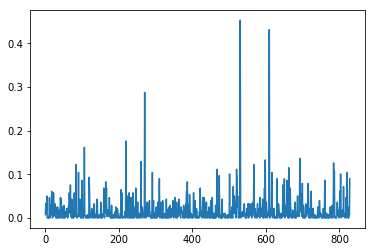

In [136]:
plt.plot((rawy<=1).mean(1))

In [171]:
np.where((rawy<=1).mean(1)>0.05)

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


(array([  4,  17,  18,  22,  65,  68,  78,  79,  83,  90, 100, 106, 119,
        120, 159, 164, 166, 206, 208, 219, 224, 227, 228, 238, 246, 260,
        270, 291, 310, 384, 386, 392, 403, 421, 467, 473, 501, 511, 514,
        520, 521, 523, 530, 567, 596, 598, 609, 616, 630, 646, 650, 657,
        662, 666, 686, 692, 697, 699, 715, 722, 760, 784, 786, 801, 803,
        811, 821, 828]),)

In [178]:
pd.Series((np.where(rawy[686]<=1)[0]+1)%7+1).value_counts()

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less_equal
  if __name__ == '__main__':


1    7
7    3
2    2
5    1
4    1
dtype: int64

In [152]:
pd.to_datetime(rrvf_data.idx_to_date([200]))[0].weekday() 

1